# Neural Network

<div>
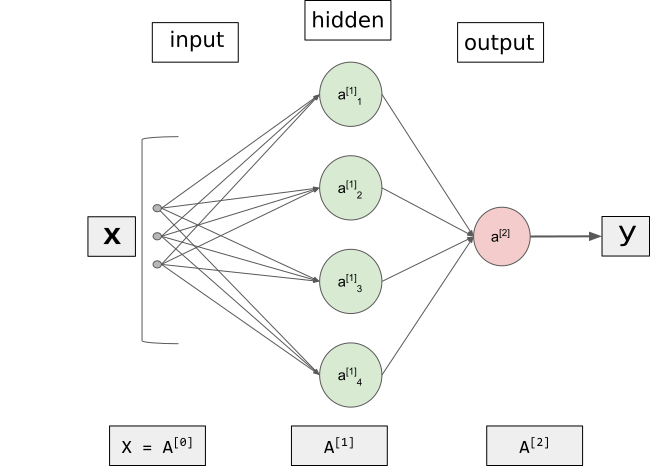
</div>

### Example: Logical gates using a single neuron

Import required packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from scipy.special import expit

print('scipy.special.expit is the logistic sigmoid function')
print('Done!')

In [ ]:
x = [-10,-2.5,0,2.5,+10]
y = expit(x)

plt.plot(x,y)
#plt.axis([-1.5,1.5,-0.1,1.1])


Plot $x_1 \lor x_2$

In [ ]:
x1 = [0,1,1,0]
x2 = [0,0,1,1]
y  = [0,1,1,1] # x1 OR x2
w1=30
w2=30
w0=20

plt.plot(x1,x2,'ro')
plt.title('x1 OR x2')
for ind in range(len(y)):
    plt.text(x1[ind],x2[ind],f'y={expit(w1*x1[ind]+w2*x2[ind]-w0):.2f}')

Plot $x_1 \land x_2$

In [ ]:
x1 = [0,1,1,0]
x2 = [0,0,1,1]
y  = [0,0,1,0] # x1 AND x2
w1=15
w2=15
w0=20

plt.plot(x1,x2,'ro')
plt.title('x1 AND x2')
for ind in range(len(y)):
    plt.text(x1[ind],x2[ind],f'y={expit(w1*x1[ind]+w2*x2[ind]-w0):.2f}')

Plot $x_1 ~XOR~ x_2$

In [ ]:
x1 = [0,1,1,0]
x2 = [0,0,1,1]
y  = [0,1,0,1] # x1 XOR x2

w11 = -20
w12 = 30
w10 = 20
w21 = 30
w22 = -20
w20 = 20

w1=30
w2=30
w0=20

plt.plot(x1,x2,'ro')
plt.title('x1 XOR x2')
for ind in range(len(y)):
    y1 = expit(w11*x1[ind]+w12*x2[ind]-w10)
    y2 = expit(w21*x1[ind]+w22*x2[ind]-w20)
    y  = expit(w1*y1+w2*y2-w0)
    plt.text(x1[ind],x2[ind],f'y={y:.2f} (y1={y1:.2f},y2={y2:.2f})')

## Exampe: GD for XOR-network of three neurons

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Training data is x_1 XOR x_2 function
x = np.array([[0,0],[1,0],[1,1],[0,1]])
y = np.array([[0,1,0,1]]).T

# Initial training parameters w_i^(t)
#w_1_t = [-10,-10,-10] # w1 w2 w0
w_1_t = np.random.normal(0,1,[3,1]) # first hidden
#w_2_t = [100,-100,50] # w1 w2 w0
w_2_t = np.random.normal(0,1,[3,1]) # second hidden
#w_3_t = [-100,100,50] # w1 w2 w0
w_t = np.random.normal(0,1,[3,1]) # output
num_of_epochs = 1000
learning_rate = 0.5

# My logistic sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Forward pass
def neuron_forward(x1,x2,w1,w2,w0):
    return sigmoid(w1*x1+w2*x2-w0)


MSE = np.zeros([num_of_epochs,1])

# Main training loop
for e in range(num_of_epochs):
    
    # Backward flow and tuning of weights    
    y_hat_sum = 0
    for n in range(x.shape[0]):
        
        x1 = x[n,0]
        x2 = x[n,1]
        y_gt = y[n]
        
        # Forward flows from inputs to outputs
        y_1 = neuron_forward(x1,x2,w_1_t[0],w_1_t[1],w_1_t[2])
        y_2 = neuron_forward(x1,x2,w_2_t[0],w_2_t[1],w_2_t[2])
        y_p = neuron_forward(y_1,y_2,w_t[0],w_t[1],w_t[2])

        # Backward flow and weight updates
        
        # Loss gradient
        sigma_loss = 2*(y_gt-y_p)*-1

        # y weight gradients
        sigma_y_p_w1 = sigma_loss*y_p*(1-y_p)*y_1
        sigma_y_p_w2 = sigma_loss*y_1*(1-y_p)*y_2
        sigma_y_p_w0 = sigma_loss*y_1*(1-y_p)*-1
        
        # y update with weight gradients
        w_t[0] = w_t[0] - learning_rate*sigma_y_p_w1
        w_t[1] = w_t[1] - learning_rate*sigma_y_p_w2
        w_t[2] = w_t[2] - learning_rate*sigma_y_p_w0
        
        # y gradient backward flow to its inputs
        sigma_y_p_y_1 = sigma_loss*y_p*(1-y_p)*w_t[0]
        sigma_y_p_y_2 = sigma_loss*y_p*(1-y_p)*w_t[1]

        # y_1 weight gradients
        sigma_y_1_w1 = sigma_y_p_y_1*y_1*(1-y_1)*x1
        sigma_y_1_w2 = sigma_y_p_y_1*y_1*(1-y_1)*x2
        sigma_y_1_w0 = sigma_y_p_y_1*y_1*(1-y_1)*-1
        
        # y_1 update with weight gradients
        w_1_t[0] = w_1_t[0] - learning_rate*sigma_y_1_w1
        w_1_t[1] = w_1_t[1] - learning_rate*sigma_y_1_w2
        w_1_t[2] = w_1_t[2] - learning_rate*sigma_y_1_w0

        # y_1 gradient backward flow not needed since there is no more neurons
        
        # y_2 weight gradients
        sigma_y_2_w1 = sigma_y_p_y_2*y_2*(1-y_2)*x1
        sigma_y_2_w2 = sigma_y_p_y_2*y_2*(1-y_2)*x2
        sigma_y_2_w0 = sigma_y_p_y_2*y_2*(1-y_2)*-1
        
        # y_2 update with weight gradients
        w_2_t[0] = w_2_t[0] - learning_rate*sigma_y_2_w1
        w_2_t[1] = w_2_t[1] - learning_rate*sigma_y_2_w2
        w_2_t[2] = w_2_t[2] - learning_rate*sigma_y_2_w0

       # y_2 gradient backward flow not needed since there is no more neurons

 
    y_h = np.zeros([x.shape[0],1])
    for n in range(x.shape[0]):
        y_1 = neuron_forward(x[n,0],x[n,1],w_1_t[0],w_1_t[1],w_1_t[2])
        y_2 = neuron_forward(x[n,0],x[n,1],w_2_t[0],w_2_t[1],w_2_t[2])
        y_p = neuron_forward(y_1,y_2,w_t[0],w_t[1],w_t[2])
        y_h[n] = y_p
    MSE[e] = np.sum((y-y_h)**2)

# Final evaluation
print(f'y_1 weights {w_1_t}')
print(f'y_2 weights {w_2_t}')
print(f'y weights {w_t}')
for n in range(x.shape[0]):
    y_1 = neuron_forward(x[n,0],x[n,1],w_1_t[0],w_1_t[1],w_1_t[2])
    y_2 = neuron_forward(x[n,0],x[n,1],w_2_t[0],w_2_t[1],w_2_t[2])
    y_p = neuron_forward(y_1,y_2,w_t[0],w_t[1],w_t[2])
    y_h[n] = y_p
    print(f'Input x=({x[n,:]}) GT: y({n})={y[n,0]:.2f} ; Pred: y_h({n})={y_h[n,0]:.2f}')
plt.plot(range(num_of_epochs),MSE)
plt.show()

In [ ]:
x1 = [0,1,1,0]
x2 = [0,0,1,1]
y  = [0,1,0,1] # x1 XOR x2

plt.plot(x1,x2,'ro')
plt.title('x1 XOR x2')
#w_1_t = w_1_t.astype(float)
#w_2_t = w_2_t.astype(float)
#w_3_t = w_3_t.astype(float)
for ind in range(len(y)):
    y1 = expit(w_2_t[0]*x1[ind]+w_2_t[1]*x2[ind]-w_2_t[2])
    y2 = expit(w_3_t[0]*x1[ind]+w_3_t[1]*x2[ind]-w_3_t[2])
    y  = expit(w_1_t[0]*y1+w_1_t[1]*y2-w_1_t[2])
    plt.text(x1[ind],x2[ind],f'y={y[0]:.2f} (y1={y1[0]:.2f},y2={y2[0]:.2f})')

## References

C.M. Bishop (2006): Pattern Recognition and Machine Learning, Chapter 5 ([PDF](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)) - Bishop's books are the best to understand neural networks before the deep era.